In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
Dat=pd.read_csv('../Scraped/CT_towns_latest.csv')
Income=pd.read_excel('ctincome2015_ct_income.xlsx')
Pop=pd.read_excel('2010_Census_population_and_Housing.xls')

In [3]:
Pop['Town']=Pop['Unnamed: 0']
Income['Town']=Income['Connecticut 2015 Income Statistics']

In [33]:
Fin=pd.merge(Dat,
                 Pop[['Unnamed: 1', 'Town']],
                 on='Town')
Fin=pd.merge(Fin,
                 Income[['Unnamed: 1', 'Town']],
                 on='Town')
Fin=Fin.rename({'Unnamed: 1_x': 'Pop', 'Unnamed: 1_y': 'Income'}, axis=1)
Fin['Dens']=Fin['Cases']/Fin['Pop']*100000
#Fin=Fin[Fin['Cases']>=100]

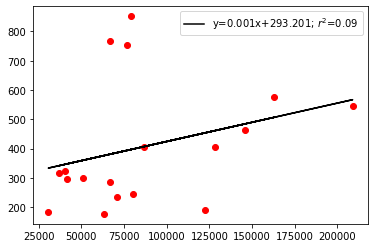

In [34]:
y=np.array(Fin['Dens']).flatten().astype(float)
x=np.array(Fin['Income']).flatten().astype(float)

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y)
plt.scatter(x,y, color='red')
plt.plot(x, intercept1 + slope1*x, 'k', label='y={:.3f}x+{:.3f}; $r^2$={:.2f}'.format(slope1,intercept1,(r_value1*r_value1)))
plt.legend()

plt.draw()
plt.savefig("Casedensity_income.png", dpi=300, bbox_inches='tight')

In [43]:
x=np.array(Fin['Income']).flatten()

In [28]:
Fin

,index,Town,Cases,Date,Lat,Lon,Pop,Income,Dens
0,1253,Harwinton,7,4/8/2020,41.761345,-73.060443,5642,91875,124.069
1,1671,Naugatuck,50,4/8/2020,41.488597,-73.051882,31862,58078,156.927
2,75,Avon,13,4/8/2020,41.787159,-72.852046,18098,123894,71.8311
3,1386,Lisbon,2,4/8/2020,41.602766,-72.012261,4338,81200,46.1042
5,1025,Glastonbury,38,4/8/2020,41.691883,-72.552173,34427,109018,110.378
...,...,...,...,...,...,...,...,...,...
164,2240,Ridgefield,114,4/8/2020,41.306249,-73.501019,24638,145902,462.7
165,132,Berlin,30,4/8/2020,41.605477,-72.778459,19866,87810,151.012
166,797,East Hartford,79,4/8/2020,41.760695,-72.607646,51252,48369,154.14
167,721,Durham,8,4/8/2020,41.468922,-72.684525,7388,113152,108.284
